In [ ]:
# Data Wrangling

In [1]:
# Import pandas
import pandas as pd

In [2]:
# Importing the data that we downloaded from Kaggle (video game sales data)
df = pd.read_csv("vgsales.csv")

In [3]:
# Now, let's inspect the data in the first four rows in the data frame.
df.head(4)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00


In [4]:
# let's check the shape of this data frame for our understanding.
df.shape

(16598, 11)

In [9]:
# Check the different data types used in the data set.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [10]:
# To find the null values in our dataset.
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [11]:
# We found that we have null values in Year(271) & in publishers(58),So now we going to remove those data.
df = df.dropna()

In [13]:
#let's check the shape of the data frame now.
df.shape

(16291, 11)

In [16]:
# Now, let's check for any duplicates in our data set.
numofduplicates = df.duplicated().sum()
numofduplicates
# we found that we dont have any duplicates in our data.

0

In [17]:
# let's view our wrangled data
df.tail(4) # now let have look at our bottom data.

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [18]:
#Exploratory Data Analysis (EDA) 

In [20]:
# Importing matplotlib.
import matplotlib.pyplot as plt

In [22]:
# Descriptive statistics of the data set.
ds = df.describe()
ds

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [24]:
#categorical variable (Genre).
category=df['Genre'].value_counts()
category

Genre
Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: count, dtype: int64

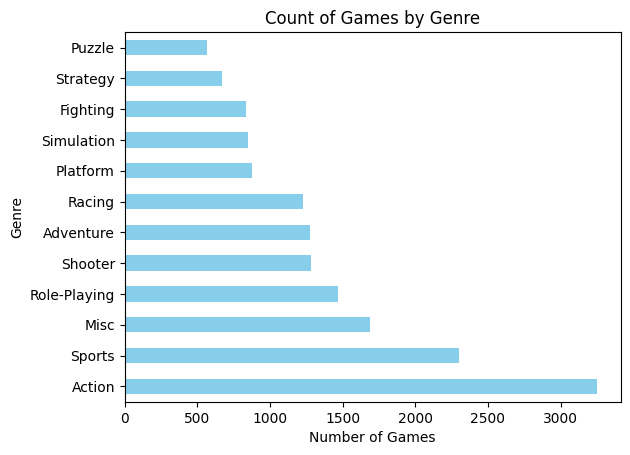

In [32]:
category.plot.barh(color='skyblue')
plt.title('Count of Games by Genre')
plt.xlabel('Number of Games')
plt.ylabel('Genre')
plt.show()

In [34]:
#categorical variable (Publishers)
publisher = df['Publisher'].value_counts()
publisher # here we found we have nearly 576 Publishers, so we can filter the top 5 or 10 publishers.

Publisher
Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Detn8 Games                        1
Pow                                1
Navarre Corp                       1
MediaQuest                         1
UIG Entertainment                  1
Name: count, Length: 576, dtype: int64

In [35]:
# Top 10 publishers as Topfive.
topfive = publisher.head(5)
topfive

Publisher
Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
Name: count, dtype: int64

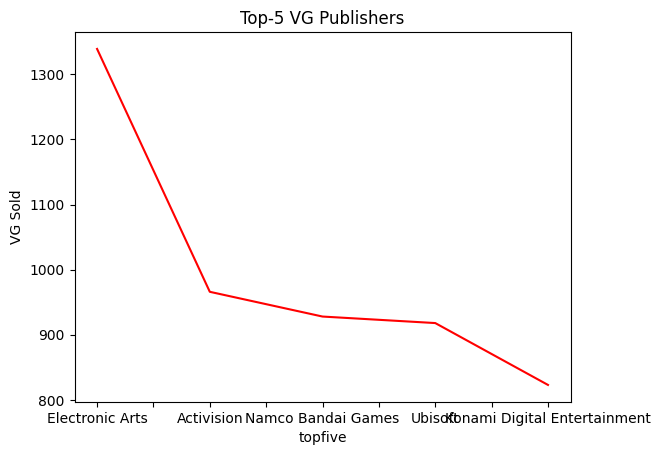

In [42]:
# We will plot a line graph for the top 5 VG Publishers.
topfive.plot.line(color='red')
plt.xlabel('topfive')
plt.ylabel('VG Sold')
plt.title("Top-5 VG Publishers")
plt.show()

In [41]:
sales=df[['Global_Sales','Year']]
topsales = sales.head(4) # we will find the highest sales year.
topsales 
# In 2006, the VG sales were around 83 globally.

,Global_Sales,Year
0,82.74,2006.0
1,40.24,1985.0
2,35.82,2008.0
3,33.00,2009.0


In [40]:
# finding the average sales in each country.
countries_sales=df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
mean = countries_sales.mean()
mean

NA_Sales       0.265647
EU_Sales       0.147731
JP_Sales       0.078833
Other_Sales    0.048426
dtype: float64

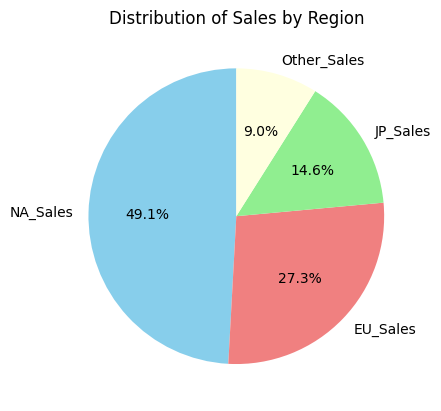

In [43]:
# Distribution of Sales by Region
labels = mean.index
sizes = mean.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen', 'lightyellow'])
plt.title('Distribution of Sales by Region')
plt.show()

In [ ]:
#Summary of this analysis.
# Action VG is popular (Action-3251).
# Among that Electronic Arts has sold the majority of VG's.
# The VG sales skyrocketed in the year of 2006.